### Questions
- No questions...yet.

Datasets:

- Weather Data set found [here](https://www.kaggle.com/budincsevity/szeged-weather)

### Objectives
YWBAT
* Apply techniques to solve a multiple linear regression problem
* Create multilinear regression models and change them to optimize results

### Outline
- Clone lesson repo to your local
- Breakout groups to build a model
    - both people should be coding
    - 1 person can screenshare
    - you can divide work (divide and conquer!)
    - Save 5-8 minutes to write a conclusion
- Present model to the class (conclusion)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import statsmodels.api as stats

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

### Task, build a model in 35-40 minutes and present it to the class 
Dataset - ```BNG_cholesterol.csv ```

Target - ```chol```

No. Features - ```13```

In [3]:
df = pd.read_csv("./data/BNG_cholesterol.csv")
df.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,46.950938,1,1,165.981331,0,2,152.691434,0,1.774223,2,0,7,3,265.569780
1,47.359284,1,4,134.748286,0,2,132.079047,1,0.407640,2,0,7,0,269.368061
2,58.455787,1,4,129.456617,0,0,164.523754,1,5.284900,2,0,7,4,244.336917
3,56.070298,1,4,124.831749,0,2,181.453944,0,1.096476,1,1,7,2,237.985356
4,44.121116,1,4,109.887955,0,2,110.055090,1,0.437412,2,0,3,1,245.907334


In [16]:
res = stats.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.800e+06
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:43:57   Log-Likelihood:            -5.3515e+06
No. Observations:             1000000   AIC:                         1.070e+07
Df Residuals:                  999987   BIC:                         1.070e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            1.4258      0.005    285.707      0.000       1.416       1.436
sex          -13.2932      0.115   -115.276      0.000     -13.519     -13.067
cp             5.8796      0.054    109.203      0.000       5.774       5.985
trestbps       0.6679      0.002    283.377      0.000       0.663       0.672
fbs            3.4092      0.142     24.068      0.000       3.132       3.687
restecg        7.3749      0.052    143.157      0.000       7.274       7.476
thalach        0.2956      0.002    159.151      0.000       0.292       0.299
exang          2.8243      0.118     23.995      0.000       2.594       3.055
oldpeak        0.2527      0.048      5.252      0.000       0.158       0.347
slope          2.3585      0.085     27.851      0.000       2.193       2.524
ca             7.0432      0.058    121.056      0.000       6.929       7.157
thal           1.6654      0.030     55.635      0.000       1.607       1.724
num            0.6076      0.043     14.289      0.000       0.524       0.691
==============================================================================
Omnibus:                    72929.043   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96856.071
Skew:                           0.648   Prob(JB):                         0.00
Kurtosis:                       3.803   Cond. No.                         576.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### High AIC/BIC and JB so residuals aren't normalized

### What makes for good AIC/BIC?
The lowest AIC/BIC

- Akaike’s Inflation Coefficient
- Bayes Inflation Coefficient - penalizes for number of features

BIC - the leanest/meanest (low -> best) - penalizes features

AIC - go between (accounting for explanation of variance and takes into account the sample size)

### Tools to use

> BoxCox will fit x to y in a linear relationship because it shows transformation needed to make x and y morenormally related

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

>VIF (Variance Inflation Factor)

https://etav.github.io/python/vif_factor_python.html

In [19]:
residuals = df.chol - res.predict()

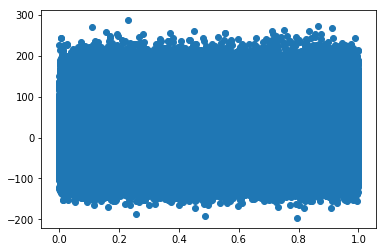

In [20]:
xs = np.linspace(0, 1, len(residuals))
plt.scatter(xs, residuals)

### Track your model stats in stepwise selection:
{mod1: {features_used:[], p_values:[], AIC:[], BIC:[], JB:[]}}

### Clean Data

### Correlation Matrix + Interpretation

### Baseline Model Using scipy.stats

### Baseline Model Using sklearn

### Iterate through models

### Cross Validate

### Final Model Summary 
- What is your model?
- What transformations/feature engineering/standardization did you do?
- What features are you using and why?
- Interpret your model features using their coefficients
- Recommendations?

### Assessment